### ME-371 Midterm assessment - Fall 2023 - Daniel Kim
#### Part 1 

In [2]:
#Question 1.1

import random as rd 
from random import randint

def random_avg(a, b, n=100, seed=1):
    rd.seed(seed)
    x = 0
    for i in range(n):
        x += rd.randint(a, b)
    return x / n

assert random_avg(0,10) == 5.28
assert random_avg(0, 10, n=1000) == 5.03
assert random_avg(0, 10, n=1000, seed=123) == 4.966
assert random_avg(0, 10, n=1_000_000, seed=123) == 4.997245


In [3]:
#Question 1.2 

import math 

def is_almost_equal(left, right, tolerance =1e-12):
    rmse, se = 0, 0
    for i in range(len(left)):
        se += (left[i] - right[i]) ** 2

    rmse = math.sqrt(se / len(left))
    if rmse < tolerance: 
        return True
    else:
        return False
    
assert is_almost_equal([1, 2, 3], [1.0001, 2.0001, 2.9999], tolerance=0.001)
assert not is_almost_equal([1, 2, 3], [1.0001, 2.0001, 2.9999])

In [44]:
#Question 1.3 

def prefix_finder(my_list, suffix):
    suffixList = []
    for i in my_list:
        if i.lower().endswith(suffix.lower()):
            modified = i.lower().replace(suffix.lower(), "")
            suffixList.append(modified.capitalize())
    return suffixList

assert prefix_finder(["Forest", "Cat", "Fastest"], "EsT") == ["For", "Fast"]
assert prefix_finder(["Forest", "Fastest", "Cat"], "AsT") == []

In [49]:
#Question 1.4
data = [ 
    (1, 23), 
    (104, -3)
]

def tuple_to_dict(data): 
    result = []
    for tup in data: 
        result.append({"col0": tup[0], "col1": tup[1]})
    return result

assert tuple_to_dict([(1, 40)]) == [{"col0": 1, "col1": 40}]
assert tuple_to_dict([(1, 40)]) == [{"col0": 1, "col1": 40}]
list_1 = [(9, 3), (12, -4), (0, 2)]
out_1 = [{"col0": 9, "col1": 3}, {"col0": 12, "col1": -4},
{"col0": 0, "col1": 2}]

assert tuple_to_dict(list_1) == out_1
list_2 = []
out_2 = []
assert tuple_to_dict(list_2) == out_2

In [57]:
#Question 1.5 

def attributes_to_dict(data):
    dict = {}  
    for tup in data:
        key = tup[0]
        values = list(tup[1:]) 
        dict[key] = values
    return dict


# checking the function
data = [
 ("123xyz", 1, "green", "apple"),
 ("456uvw", 0),
 ("209abc",),
 ("845lmn", 2, "blue", "ocean", "salmon"),
 ]
out = {
 "123xyz": [1, "green", "apple"],
 "456uvw": [0],
 "209abc": [],
 "845lmn": [2, "blue", "ocean", "salmon"],
 }

assert attributes_to_dict(data) == out

In [70]:
#Question 1.6
COUNTS = {
    "u13": 10,
    "a41": 12,
    "c20": 2
}

def lookup(keys):
    total = 0
    for key in keys:
        if key in COUNTS:
            total += COUNTS[key]
    return total

assert lookup(["d23"]) == 0
assert lookup(["u13"]) == 10
assert lookup(["u13", "a41"]) == 22
assert lookup(["u13", "a41", "d23"]) == 22


In [ ]:
#Question 1.7

data = {
 "c1X2": (max, [10, 0, -2]),
 "d4Y0": (sum, [-3, -2, -5, 4, 6]),
 "x1C9": (min, [0, -2, -9, 3]),
}

def reducer(data): 
    

In [ ]:
#Question 1.8 


In [ ]:
#Question 1.9 

In [36]:
import pandas as pd
URL = 'https://raw.githubusercontent.com/MasoudMiM/MECG_542/master/Manufacturing_Industry_Database/Manufacturing_Industry_Database.csv'
df = pd.read_csv(URL)
df.head(1)

,naics,naics_title,year,emp,pay,prode,prodh,prodw,vship,matcost,...,equip,plant,piship,pimat,piinv,pien,dtfp5,tfp5,dtfp4,tfp4
0,311111,Dog and Cat Food Manufacturing,1958,18.0,81.3,12.0,25.7,49.8,1042.4,752.4,...,517.6,695.0,0.354,0.133,0.168,0.116,NaN,0.317,NaN,0.318


In [9]:
#Question 2.1 

print ("There are",df["naics_title"].nunique(), "Unique NAICS industries represented in the dataset" )

There are 364 Unique NAICS industries represented in the dataset


In [10]:
#Question 2.2 
df.rename(columns={'naics_title':'NAICS Industry','emp': 'Employees'}, inplace=True)
df2 = df[df['year'] == 2018]
df2 = df2[['NAICS Industry', 'Employees']]
df2 = df2.groupby('NAICS Industry').sum()
df2.reset_index(inplace=True)
df2 = df2.sort_values(by=['Employees'], ascending=False)
display(df2)


,NAICS Industry,Employees
19,All Other Plastics Product Manufacturing,379.2
60,Commercial Printing (except Screen and Books),315.6
267,Poultry Processing,233.1
164,Machine Shops,231.8
5,Aircraft Manufacturing,171.9
...,...,...
218,Other Apparel Knitting Mills,2.3
357,Women's Handbag and Purse Manufacturing,1.6
166,Malt Manufacturing,1.2
199,Newsprint Mills,1.1


In [11]:
#Question 2.3 
df3 = df[df['year'] == 2018]
df3 = df3[['NAICS Industry', 'pay']]
df3 = df3.groupby('NAICS Industry').sum()
df3.reset_index(inplace=True)
df3 = df3.sort_values(by=['pay'], ascending=False)
display("The industry with the highest total annual payroll in 2018 is:", df3.head(1))

'The industry with the highest total annual payroll in 2018 is:'

,NAICS Industry,pay
5,Aircraft Manufacturing,17366.5


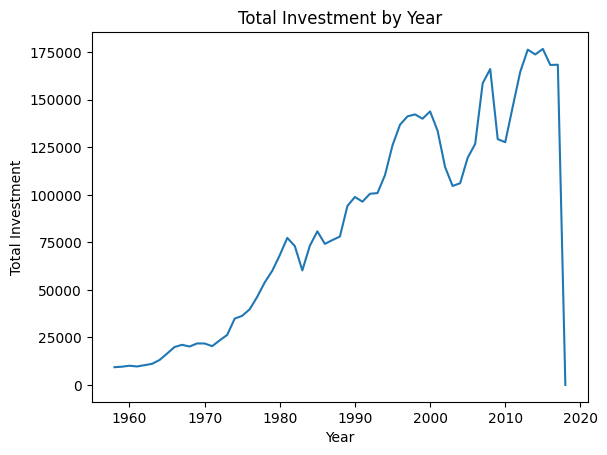

In [12]:
#Question 2.4 
import matplotlib.pyplot as plt 
df4 = df[['year', 'invest']]
df4 = df4.groupby('year').sum()
df4.reset_index(inplace=True)
plt.plot(df4['year'],df4['invest']) 
plt.title('Total Investment by Year')
plt.xlabel('Year')
plt.ylabel('Total Investment')
plt.show()

In [13]:
#Question 2.5 
df5 = df[df['year'] == 2015]
df5 = df5[['NAICS Industry', 'tfp5']] 
df5 = df5.sort_values(by=['tfp5'], ascending=False)
display("The industry with the highest 5-factor TFP index in 2015 is", 
        df5.head(1))

'The industry with the highest 5-factor TFP index in 2015 is'

,NAICS Industry,tfp5
6584,Petrochemical Manufacturing,1.987


In [ ]:
#Question 2.6 


In [14]:
#Question 2.7
df1990 = df[df['year'] == 1990][['NAICS Industry', 'prodh']]
df2000 = df[df['year'] == 2000][['NAICS Industry', 'prodh']]
combined_df = df1990.merge(df2000, on='NAICS Industry', suffixes=('_1990', '_2000'), how='outer')
combined_df['prodh_change'] = (combined_df['prodh_2000'] - combined_df['prodh_1990'])
combined_df = combined_df.sort_values(by=['prodh_change'], ascending=False)
display( 'The industry with the highest production worker hours increase between 1990 and 2000 is', combined_df.head(1))

'The industry with the highest production worker hours increase between 1990 and 2000 is'

,NAICS Industry,prodh_1990,prodh_2000,prodh_change
146,All Other Plastics Product Manufacturing,629.9,869.4,239.5


In [15]:
#Question 2.8
df2015 = df[df['year'] == 2015]
df2015 = df2015.sort_values(by=['matcost'], ascending=False)
display('The industry with the highest total cost of materials in 2015 is', df2015.iloc[0]['NAICS Industry'])
display('the percentage of matcost relative to total value added was', df2015.iloc[0]['matcost'] / df2015.iloc[0]['vadd'] *100, '%')

'The industry with the highest total cost of materials in 2015 is'

'Petroleum Refineries'

'the percentage of matcost relative to total value added was'

432.4734652980857

'%'

Text(0.5, 1.0, 'Top 15 4-factor TFP index in 2010')

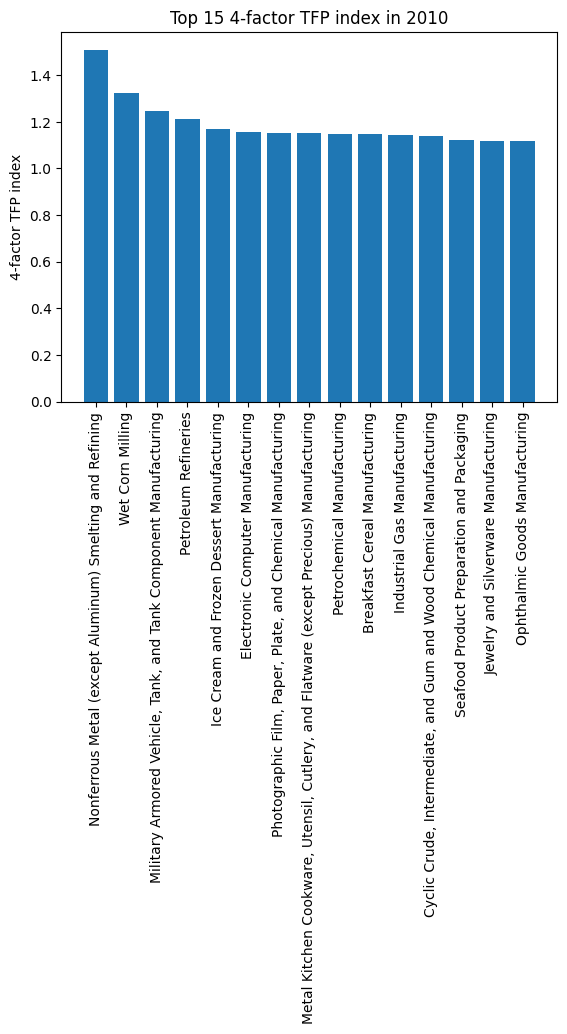

In [25]:
#Question 2.9
import matplotlib.pyplot as plt
df2010 = df[df['year'] == 2010][['NAICS Industry', 'tfp4']]
df2010 = df2010.sort_values(by='tfp4', ascending=False)
plt.bar(df2010.head(15)['NAICS Industry'], df2010.head(15)['tfp4'])
plt.xticks(rotation=90)
plt.ylabel('4-factor TFP index')
plt.title('Top 15 4-factor TFP index in 2010')


Text(0.5, 1.0, 'Distribution of total real capital stock')

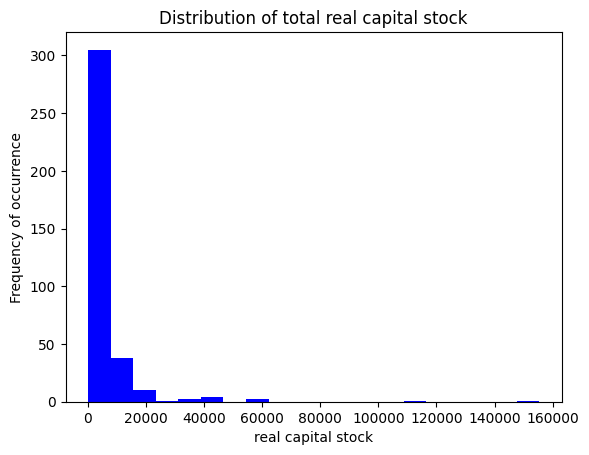

In [29]:
#Question 2.10 

import matplotlib.pyplot as plt
df2010 = df[df['year'] == 2010][['cap']]
df2010['cap'].plot.hist(bins=20,color='blue')
plt.xlabel('real capital stock')
plt.ylabel('Frequency of occurrence')
plt.title('Distribution of total real capital stock')


In [52]:
#Question 2.11 
filtered_df = df[df['dtfp5'].notnull()]
df11 = filtered_df[df.groupby('naics_title')['naics_title'].transform('count')>=20]
df11['naics_title'].nunique()

/var/folders/ns/jqbmsvyx0b509jxmps8xv58h0000gr/T/ipykernel_9388/199802456.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df11 = filtered_df[df.groupby('naics_title')['naics_title'].transform('count')>=20]


364